<a href="https://colab.research.google.com/github/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/06_Model_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 
<strong> 
    <h1 align='center'></h1> 
</strong>

---


--- 
<strong> 
    <h1 align='center'>Model Tuning</h1> 
</strong>

---


<p align='center'>
    <a href='#'><img src='https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/28_Machine-Learning-with-Tree-Based-Models-in-Python/_img/hyperparameter.png?raw=true'>
    </a>
</p>

In [1]:
! git clone https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python.git

Cloning into 'CAREER-TRACK-Data-Scientist-with-Python'...
remote: Enumerating objects: 340, done.
remote: Counting objects: 100% (340/340), done.
remote: Compressing objects: 100% (308/308), done.
remote: Total 2526 (delta 118), reused 211 (delta 31), pack-reused 2186
Receiving objects: 100% (2526/2526), 304.54 MiB | 29.62 MiB/s, done.
Resolving deltas: 100% (896/896), done.
Checking out files: 100% (1058/1058), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('ggplot')
#sns.set_theme(style='whitegrid')
%matplotlib inline

In [3]:
os.chdir('/content/CAREER-TRACK-Data-Scientist-with-Python/28_Machine-Learning-with-Tree-Based-Models-in-Python/_dataset')
cwd = os.getcwd()
print('Curent working directory is ', cwd)

Curent working directory is  /content/CAREER-TRACK-Data-Scientist-with-Python/28_Machine-Learning-with-Tree-Based-Models-in-Python/_dataset


In [4]:
ls

auto.csv   indian_liver_patient.csv               wbc.csv
bikes.csv  indian_liver_patient_preprocessed.csv


# **Tuning a CART's Hyperparameters**

- ***Hyperparameters***
    - Machine learning model:
        - **parameters**: learned from data
            - **CART** example: ***split-point*** of a node, ***split-feature*** of a node, ...
        - **hyperparameters**: not learned from data, set prior to training
            - **CART** example: `max_depth`, `min_samples_leaf`, ***splitting criterion***, ...

$\Rightarrow$ **What is hyperparameter tuning?**
- __Problem__: Search for a set of optimal hyperparameters for a learning algorithm.
- __Solution__: find a set of optimal hyperparameters that results in an optimal model.
- __Optimal model__: yields an optimal score
- __Score__ : defaults to accuracy (__classification__) and $R^2$ (__regression__)
- __Cross-validation__ is used to estimate the generalization performance.


$\Rightarrow$ **Approaches to hyperparameter tuning**
- ___Grid Search___

    Grid search is a __tuning technique__ that attempts to compute the optimum values of hyperparameters. It is an __exhaustive search__ that is performed on a the specific parameter values of a model. The model is also known as an __estimator__. Grid search exercise can save us time, effort and resources.

    `GridSearchCV` is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.

<p align='center'>
    <a href='#'><img src='https://i2.wp.com/neptune.ai/wp-content/uploads/grid_random.png?resize=569%2C301&ssl=1'>
    </a>
</p>

- ___Random Search___

    Random search (RS) is a family of numerical optimization methods that do not require the gradient of the problem to be optimized, and RS can hence be used on functions that are not continuous or differentiable. Such optimization methods are also known as direct-search, derivative-free, or black-box methods.

    Random search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model. It is similar to grid search, and yet it has proven to yield better results comparatively. The drawback of random search is that it yields high variance during computing.

    In Grid Search, the data scientist sets up a grid of hyperparameter values and for __each combination__, trains a model and scores on the testing data. By contrast, Random Search sets up a grid of hyperparameter values and __selects random combinations__ to train the model and score

- ___Bayesian Optimization___

    Bayesian optimization is a sequential design strategy for global optimization of black-box functions that does not assume any functional forms. It is usually employed to optimize expensive-to-evaluate functions

    Bayesian Optimization is an approach that uses Bayes Theorem to direct the search in order to find the minimum or maximum of an objective function. It is an approach that is most useful for objective functions that are complex, noisy, and/or expensive to evaluate.

    By evaluating hyperparameters that appear more promising from past results, Bayesian methods can find better model settings than random search in fewer iterations. Bayesian hyperparameter optimization takes that framework and applies it to finding the best value of model settings!

- ___Genetic Algorithm___

    Genetic Algorithm (GA) is a search-based optimization technique based on the principles of Genetics and Natural Selection. It is frequently used to find optimal or near-optimal solutions to difficult problems which otherwise would take a lifetime to solve.

    Genetic algorithms are __stochastic search algorithms__ which act on a population of possible solutions.


$\Rightarrow$ **Grid search cross validation**
- Manually set a grid of discrete hyperparameter values.
- Set a metric for scoring model performance.
- Search exhaustively through the grid.
- For each set of hyperparameters, evaluate each model's CV score
- The optimal hyperparameters are those of the model achieving the best CV score.

### Tree hyperparameters
We'll revisit the [Indian Liver Patient](https://www.kaggle.com/uciml/indian-liver-patient-records) dataset.

Our task is to tune the __hyperparameters__ of a classification tree. Given that this dataset is imbalanced, we'll be using the __ROC-AUC__ score as a metric instead of accuracy.

- Preprocess

In [5]:
df_liver = pd.read_csv('indian_liver_patient_preprocessed.csv', index_col=0)
df_liver.head(2)

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1


In [6]:
X = df_liver.drop('Liver_disease', axis='columns')
y = df_liver['Liver_disease']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt
dt = DecisionTreeClassifier()

# Check default hyperparameter
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

### Set the tree's hyperparameter grid
In this exercise, you'll manually set the grid of hyperparameters that will be used to tune the classification tree ```dt``` and find the optimal classifier in the next exercise.



In [9]:
# Define params_dt
params_dt = {
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [0.12, 0.14, 0.16, 0.18],
}

### Search for the optimal tree
In this exercise, you'll perform grid search using 5-fold cross validation to find ```dt```'s optimal hyperparameters. Note that because grid search is an exhaustive process, it may take a lot time to train the model. Here you'll only be instantiating the ```GridSearchCV``` object without fitting it to the training set. As discussed in the video, you can train such an object similar to any scikit-learn estimator by using the ```.fit()``` method:
```python
grid_object.fit(X_train, y_train)
```


In [10]:
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, scoring='roc_auc', cv=5, n_jobs=-1)

grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'min_s

### Evaluate the optimal tree
In this exercise, you'll evaluate the test set ROC AUC score of grid_dt's optimal model.

In order to do so, you will first determine the probability of obtaining the positive label for each test set observation. You can use the method ```predict_proba()``` of an sklearn classifier to compute a 2D array containing the probabilities of the negative and positive class-labels respectively along columns.

In [11]:
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print("Test set ROC AUC score: {:.3f}".format(test_roc_auc))

Test set ROC AUC score: 0.681


# **Tuning a Tuning Random's Hyperparameters**

- ***Random Forest Hyperparameters***
    - CART hyperparameters
    - number of estimators
    - Whether it uses bootstrapping or not
- ***Tuning is expensive***
    - Hyperparameter tuning:
        - Computationally expensive,
        - sometimes leads to very slight improvement
    - Weight the impact of tuning on the whole project

We have instantiated a `RandomForestRegressor` called `rf` using `sklearn`'s default hyperparameters. we can inspect the hyperparameters of `rf` in your console.

***Which of the following is not a hyperparameter of rf?***

- min_weight_fraction_leaf

- criterion

- $\Rightarrow $__learning_rate__ 

- warm_start

### Random forests hyperparameters

In the following exercises, we'll be revisiting the [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) dataset.

Recall that your task is to predict the bike rental demand using historical weather data from the Capital Bikeshare program in Washington, D.C. For this purpose, you'll be tuning the hyperparameters of a Random Forests regressor.

- Preprocess

In [12]:
bike = pd.read_csv('bikes.csv')
bike.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [13]:
X = bike.drop('cnt', axis='columns')
y = bike['cnt']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor()

# Get hyperparameters
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Set the hyperparameter grid of RF
In this exercise, you'll manually set the grid of hyperparameters that will be used to tune ```rf```'s hyperparameters and find the optimal regressor. For this purpose, you will be constructing a grid of hyperparameters and tune the number of estimators, the maximum number of features used when splitting each node and the minimum number of samples (or fraction) per leaf.

In [16]:
# Define the dicrionary 'params_rf'
params_rf = {
    'n_estimators': [100, 350, 500],
    'max_features': ['log2', 'auto', 'sqrt'],
    'min_samples_leaf': [2, 10, 30],
}

### Search for the optimal forest
In this exercise, you'll perform grid search using 3-fold cross validation to find ```rf```'s optimal hyperparameters. To evaluate each model in the grid, you'll be using the negative mean squared error metric.

Note that because grid search is an exhaustive search process, it may take a lot time to train the model. Here you'll only be instantiating the ```GridSearchCV``` object without fitting it to the training set. As discussed in the video, you can train such an object similar to any scikit-learn estimator by using the ```.fit()``` method:
```python
grid_object.fit(X_train, y_train)
```

In [17]:
from sklearn.model_selection import GridSearchCV

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf, param_grid=params_rf, scoring='neg_mean_squared_error', cv=3,
                      verbose=1, n_jobs=-1)

# fit model
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   40.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

### Evaluate the optimal forest
In this last exercise of the course, you'll evaluate the test set RMSE of ```grid_rf```'s optimal model.

In [18]:
from sklearn.metrics import mean_squared_error as MSE

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred) ** 0.5

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test))

Test RMSE of best model: 54.467


---
---
---

# **Tuning CART**

In [19]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# loding the data into the pandas dataframe
df_liver = pd.read_csv('indian_liver_patient_preprocessed.csv', index_col=0)

# Subseting feature and lables from the data set
X = df_liver.drop('Liver_disease', axis='columns')
y = df_liver['Liver_disease']

# Spliting the data into train & test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2)

# Instantiate DecisionTreeClassifier `dt`
dt = DecisionTreeClassifier()

# Check default hyperparameter
dt.get_params()

# Set the tree's hyperparameter grid--------------------------------------------
# Define params_dt
params_dt = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_leaf': [0.04, 0.06, 0.08],
    'max_features': [0.2, 0.4, 0.6, 0.8]
}

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt, 
                       param_grid=params_dt,
                       scoring='accuracy',
                       cv=10,             # 5-fold cross validation
                       n_jobs=-1)

grid_dt.fit(X_train, y_train)
 
# Evaluate the optimal tree-----------------------------------------------------
# Extract the best params
best_hyperparmas = grid_dt.best_params_
print('Best hyperparameters:\n', best_hyperparmas)

# Extract the best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_
print('Best CV accuracy:\n', best_CV_score)

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_

# Evaluate test set accuracy
test_acc = best_model.score(X_test,y_test)

# Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_acc))

Best hyperparameters:
 {'max_depth': 4, 'max_features': 0.8, 'min_samples_leaf': 0.06}
Best CV accuracy:
 0.7107770582793709
Test set accuracy of best model: 0.690


Test set ROC AUC score: 0.681


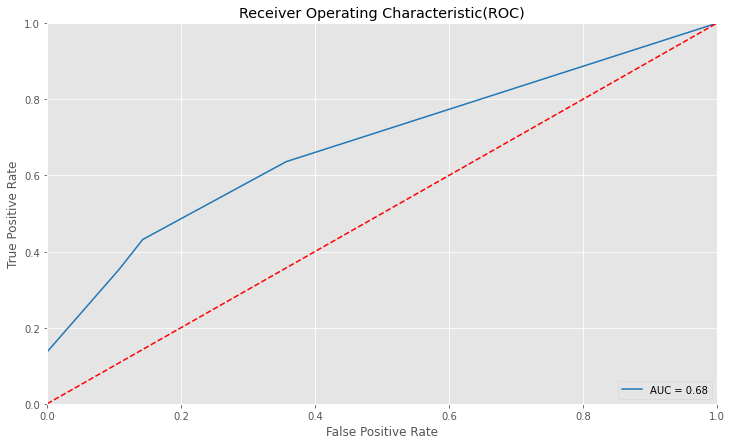

In [20]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# loding the data into the pandas dataframe
df_liver = pd.read_csv('indian_liver_patient_preprocessed.csv', index_col=0)

# Subseting feature and lables from the data set
X = df_liver.drop('Liver_disease', axis='columns')
y = df_liver['Liver_disease']

# Spliting the data into train & test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2)

# Instantiate DecisionTreeClassifier `dt`
dt = DecisionTreeClassifier()

# Check default hyperparameter
dt.get_params()

# Set the tree's hyperparameter grid--------------------------------------------
# Define params_dt
params_dt = {
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [0.12, 0.14, 0.16, 0.18],
}

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt, 
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,             # 5-fold cross validation
                       n_jobs=-1)

grid_dt.fit(X_train, y_train)
 
# Evaluate the optimal tree-----------------------------------------------------
# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print("Test set ROC AUC score: {:.3f}".format(test_roc_auc))


import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# calculate the fpr and tpr for all thresholds of the classification
# Compute the probabilities of obtaining the positive class
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)

# plot
plt.figure(figsize=(12, 7))
plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(fpr, tpr, color='tab:blue', label='AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Tuning Random Forest**

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as MSE

# loding the data into the pandas dataframe 
bike = pd.read_csv('bikes.csv')

# Subseting feature and lables from the data set
X = bike.drop('cnt', axis='columns')
y = bike['cnt']

# Spliting the data into train & test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2)

# Instantiate rf
rf = RandomForestRegressor()

# Get hyperparameters
rf.get_params()

# Set the hyperparameter grid of RF---------------------------------------------
# Define the dicrionary 'params_rf'
params_rf = {
    'n_estimators': [100, 350, 500],
    'max_features': ['log2', 'auto', 'sqrt'],
    'min_samples_leaf': [2, 10, 30],
}

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf, 
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1, 
                       n_jobs=-1)

# fit model
grid_rf.fit(X_train, y_train)

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred)**0.5

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test))

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   40.5s finished


Test RMSE of best model: 54.418


## **Summary**

- In **Chapter 1**, we have started off by understanding and applying the CART algorithm to train decision trees or CARTs for problems involving classification and regression.

- In **Chapter 2**, we have understood what the generalization error of a supervised learning model is. In addition, you also learned how underfitting and overfitting can be diagnosed with cross-validation. Furthermore, you learned how model ensembling can produce results that are more robust than individual decision trees.

- In **Chapter 3**, we have applied randomization through bootstrapping and constructed a diverse set of trees in an ensemble through bagging. You also explored how random forests introduces further randomization by sampling features at the level of each node in each tree forming the ensemble.

- **Chapter 4** introduced boosting, an ensemble method in which predictors are trained sequentially and where each predictor tries to correct the errors made by its predecessor. Specifically, you saw how AdaBoost involved tweaking the weights of the training samples while gradient boosting involved fitting each tree using the residuals of its predecessor as labels. You also learned how subsampling instances and features can lead to a better performance through Stochastic Gradient Boosting.

- Finally, in **Chapter 5**, we have explored hyperparameter tuning through Grid Search cross-validation and you learned how important it is to get the most out of your models.

<p align='center'> 
    <a href="https://twitter.com/F4izy"> 
        <img src="https://th.bing.com/th/id/OIP.FCKMemzqNplY37Jwi0Yk3AHaGl?w=233&h=207&c=7&o=5&pid=1.7" width=50px 
            height=50px> 
    </a> 
    <a href="https://www.linkedin.com/in/mohd-faizy/"> 
        <img src='https://th.bing.com/th/id/OIP.idrBN-LfvMIZl370Vb65SgHaHa?pid=Api&rs=1' width=50px height=50px> 
    </a> 
</p>